In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset from Seaborn and call it 'df'
df = sns.load_dataset('titanic')

# Display first 5 rows
print("Dataset loaded successfully. Here are the first 5 passengers:")
df.head()

Dataset loaded successfully. Here are the first 5 passengers:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# 1. Check for missing values
print("Missing Values Before Cleaning:")
print(df.isnull().sum())
print("\n")

# 2. Handle missing values
# For numerical columns (age, fare), fill with median
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

# For categorical columns (embarked, deck), fill with mode (most common value)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])

# 3. Drop the 'alone' column as it's not needed
df = df.drop('alone', axis=1)

# 4. Drop duplicates (rows that are exact copies of other rows)
df = df.drop_duplicates()

# 5. Check again for missing values to confirm our cleaning worked
print("Missing Values After Cleaning:")
print(df.isnull().sum())
print("\nNew Dataset Shape:", df.shape)

Missing Values Before Cleaning:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


Missing Values After Cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
dtype: int64

New Dataset Shape: (779, 14)


/tmp/ipython-input-3814902459.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='pastel')


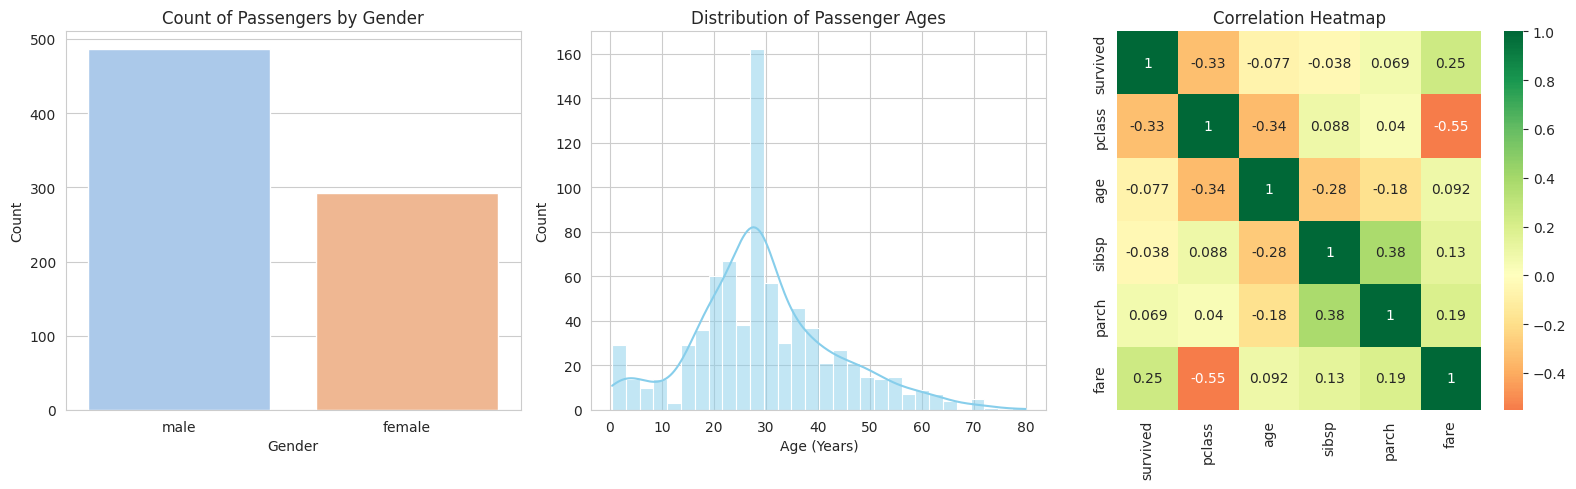

In [3]:
# Set a style for the plots
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))

# 1. Bar Chart: Count of Male vs Female Passengers
plt.subplot(1, 3, 1)
sns.countplot(x='sex', data=df, palette='pastel')
plt.title('Count of Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# 2. Histogram: Distribution of Age
plt.subplot(1, 3, 2)
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age (Years)')
plt.ylabel('Count')

# 3. Heatmap: Correlation between numerical features
plt.subplot(1, 3, 3)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='RdYlGn', center=0)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

In [4]:
# Calculate key statistics
total_passengers = len(df)
male_count = df[df['sex']=='male'].shape[0]
female_count = df[df['sex']=='female'].shape[0]

survival_by_sex = df.groupby('sex')['survived'].mean() * 100
survival_by_class = df.groupby('pclass')['survived'].mean() * 100

# Print the insights
print("KEY INSIGHTS FROM THE TITANIC DATASET:")
print("--------------------------------------")
print(f"1. Gender Distribution: There were {male_count} male and {female_count} female passengers.")
print(f"2. Survival by Gender: {survival_by_sex['female']:.1f}% of women survived, compared to only {survival_by_sex['male']:.1f}% of men.")
print(f"3. Survival by Class: {survival_by_class[1]:.1f}% of 1st class passengers survived, vs {survival_by_class[3]:.1f}% of 3rd class.")
print("4. Age Insight: The histogram shows most passengers were young adults, aged between 20-40 years old.")
print("5. Main Correlation: The heatmap shows that passenger class ('pclass') had the strongest link to survival chance.")

KEY INSIGHTS FROM THE TITANIC DATASET:
--------------------------------------
1. Gender Distribution: There were 486 male and 293 female passengers.
2. Survival by Gender: 74.1% of women survived, compared to only 21.6% of men.
3. Survival by Class: 63.2% of 1st class passengers survived, vs 25.9% of 3rd class.
4. Age Insight: The histogram shows most passengers were young adults, aged between 20-40 years old.
5. Main Correlation: The heatmap shows that passenger class ('pclass') had the strongest link to survival chance.
